# Maze Solver Assignment

## Introduction
In this assignment, you are tasked with implementing a pathfinding algorithm to solve a maze. The maze is represented as a grid of cells, where each cell can either be open (path) or blocked (wall). You will write an algorithm to find a path from the start position to the end position of the maze.

## Core Library Documentation

### Maze Class

- `__init__(self, width, height)`: Initializes a new Maze instance with the given width and height.
- `generate_maze(self)`: Generates a new random maze.
- `display(self, player_pos=None)`: Displays the maze using matplotlib, optionally marking the player's position.
- `get_possible_moves(self, current_pos)`: Returns a list of possible moves ('up', 'down', 'left', 'right') from the current position.
- `move_player(self, player, direction)`: Attempts to move the player in the given direction and returns the new position. If the move is not valid, it returns the current position.
- `is_move_valid(self, current_pos, direction)`: Checks if a move in a certain direction is valid from the current position.
- `has_reached_goal(self, current_pos)`: Checks if the current position is the goal position.
- `mark_visited(self, pos)`: Marks a cell at the specified position as visited.

### Player Class

- `__init__(self, start_pos)`: Initializes a new Player instance at the given start position.
- `move(self, direction, maze)`: Moves the player in the given direction if possible. The maze is used to check for walls and boundaries.

## Assignment Task

Your task is to implement the `find_path` function using the Depth-First Search (DFS) algorithm. This function should return the path found as a list of positions (tuples), starting from the start position and ending at the goal position. If no path is found, it should return None.

Utilize the methods provided by the Maze and Player classes to interact with the maze. You should not need to modify these classes or directly access the maze grid.

Good luck, and remember to test your solution thoroughly!


No path found.


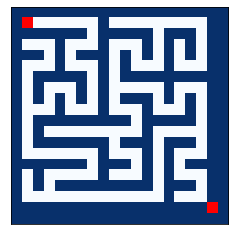

In [6]:
from maze import Maze, Player

def dfs(maze, player, goal, visited=set()):
    # Mark the current position as visited
    current_pos = player.position
    maze.mark_visited(current_pos)
    visited.add(current_pos)

    # Check if the current position is the goal
    if maze.has_reached_goal(current_pos):
        return True

    # Explore possible moves from the current position
    for move in maze.get_possible_moves(current_pos):
        # Calculate the new position based on the current position and the move direction
        x, y = current_pos
        if move == "up":
            new_pos = (x - 1, y)
        elif move == "down":
            new_pos = (x + 1, y)
        elif move == "left":
            new_pos = (x, y - 1)
        elif move == "right":
            new_pos = (x, y + 1)
        
        # If the new position has not been visited, attempt to move the player
        if new_pos not in visited:
            player.position = new_pos  # Update the player's position
            if dfs(maze, player, goal, visited):
                return True
            # If moving to the new position did not lead to a solution, backtrack
            player.position = current_pos  # Revert the player's position

    # If none of the moves lead to the goal, return False
    return False


# Setup the maze and player
maze = Maze(20, 20)
maze.generate_maze()
player = Player(maze.start_pos)

# Run DFS to find a path from start to goal
if dfs(maze, player, maze.end_pos):
    print("A path has been found!")
else:
    print("No path found.")

# Display the maze after attempting to solve
maze.display(player.position)

